### 1.4.9 Contours in OpenCV ###

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (15, 15)

In [13]:
img = cv2.imread('logo.png')
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im_gray = 255 - im_gray

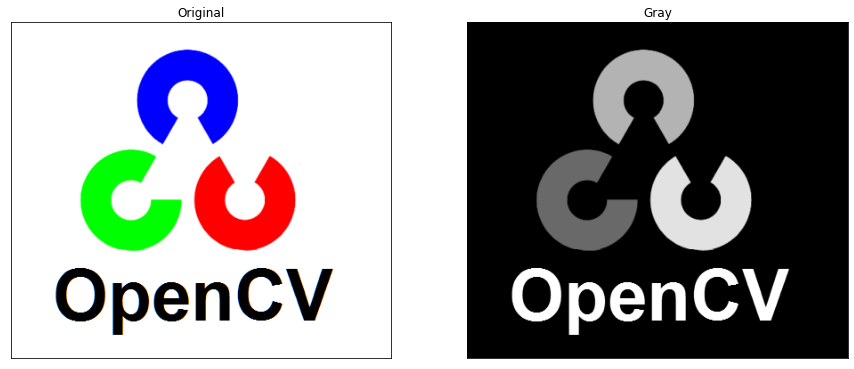

In [14]:
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(im_gray, cmap='gray')
plt.title('Gray')
plt.xticks([]), plt.yticks([])

plt.show()

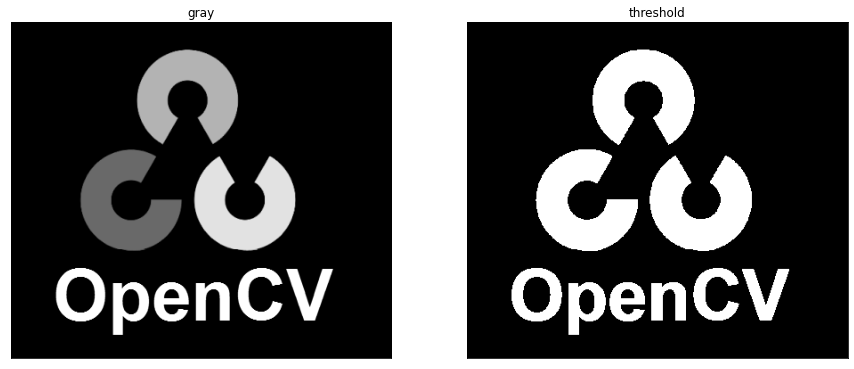

In [15]:
ret, thresh = cv2.threshold(im_gray, 8, 255, cv2.THRESH_BINARY)

plt.subplot(121)
plt.imshow(im_gray, cmap='gray')
plt.title('gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(thresh, cmap='gray')
plt.title('threshold')
plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
cnt, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

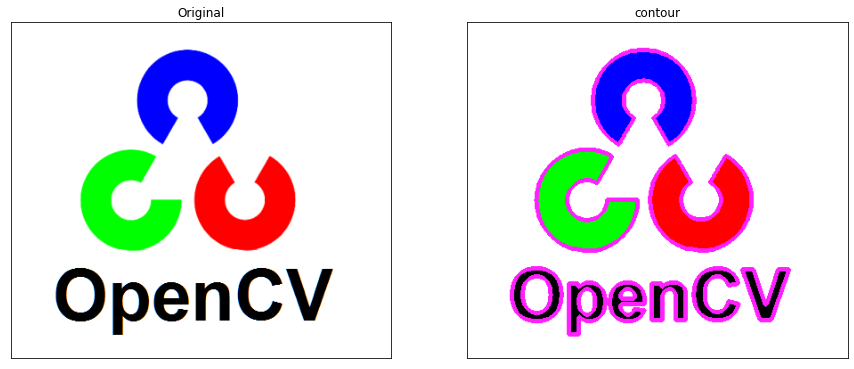

In [18]:
img_cnt = cv2.drawContours(img, cnt, -1, (255,32,255), 3)
img = cv2.imread('logo.png')

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_cnt)
plt.title('contour')
plt.xticks([]), plt.yticks([])

plt.show()

In [19]:
c = cnt[0]
epsilon = 0.01 * cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, epsilon, True)

In [20]:
img_cnt = cv2.imread('logo.png')
img_cnt = cv2.drawContours(img_cnt, [c], -1, (255, 32, 255), 3)

img_approx = cv2.imread('logo.png')
img_approx = cv2.drawContours(img_approx, [approx], -1, (255, 32, 255), 3)
img = cv2.imread('logo.png')

In [21]:
c.shape, approx.shape

((39, 1, 2), (13, 1, 2))

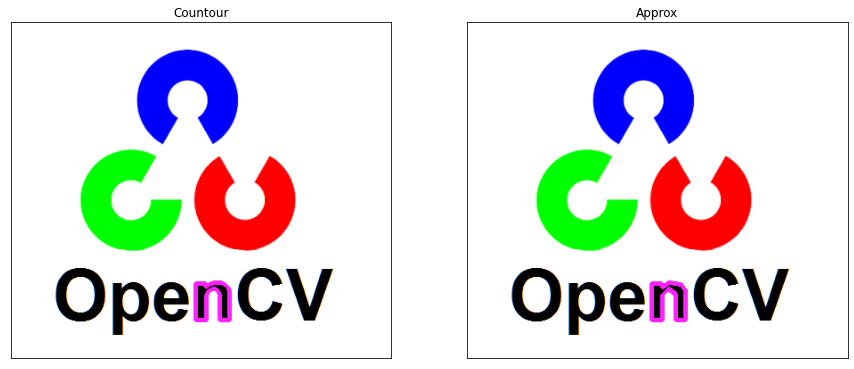

In [22]:
plt.subplot(121)
plt.imshow(img_cnt)
plt.title('Countour')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_approx, cmap='gray')
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.show()

In [23]:
hull = cv2.convexHull(approx)

In [24]:
img_hull = cv2.imread('logo.png')
img_hull = cv2.drawContours(img_hull, [hull], -1, (255, 32, 255), 3)

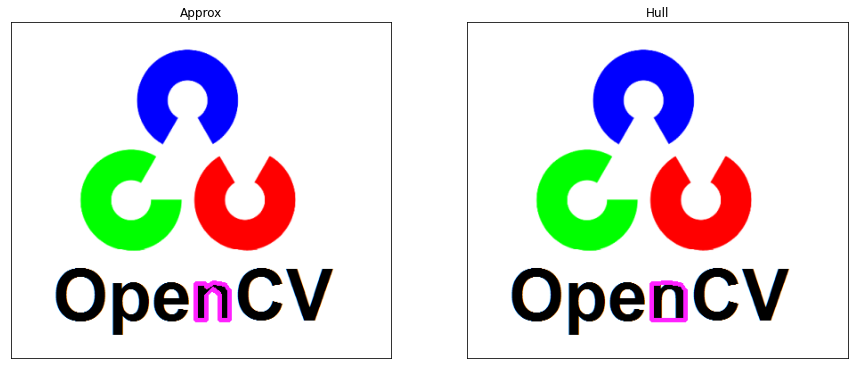

In [26]:
plt.subplot(121)
plt.imshow(img_approx, cmap='gray')
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_hull, cmap='gray')
plt.title('Hull')
plt.xticks([]), plt.yticks([])

plt.show()

In [27]:
img_box = cv2.imread('logo.png')

for c in cnt:
    x, y, w, h = cv2.boundingRect(c)

    img_box = cv2.rectangle(img_box, (x, y), (x+w, y+h), (255, 0, 0), 2)

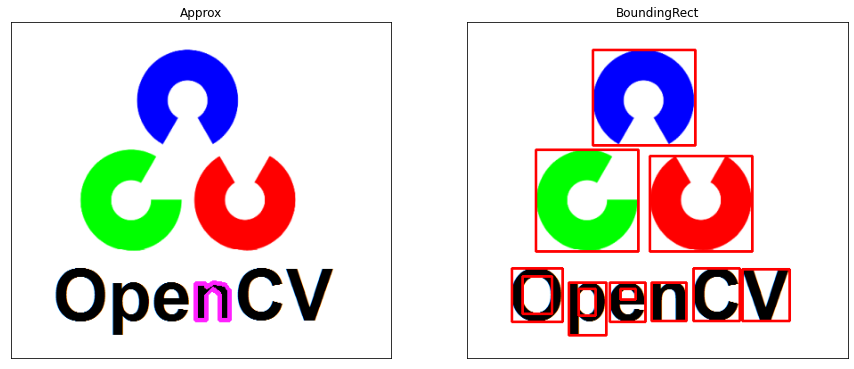

In [28]:
plt.subplot(121)
plt.imshow(img_approx, cmap='gray')
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_box)
plt.title('BoundingRect')
plt.xticks([]), plt.yticks([])

plt.show()

In [29]:
img_cnt = cv2.imread('logo.png')


for c in cnt:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    img_cnt = cv2.drawContours(img_cnt, [box], 0, (0, 0, 255), 2)

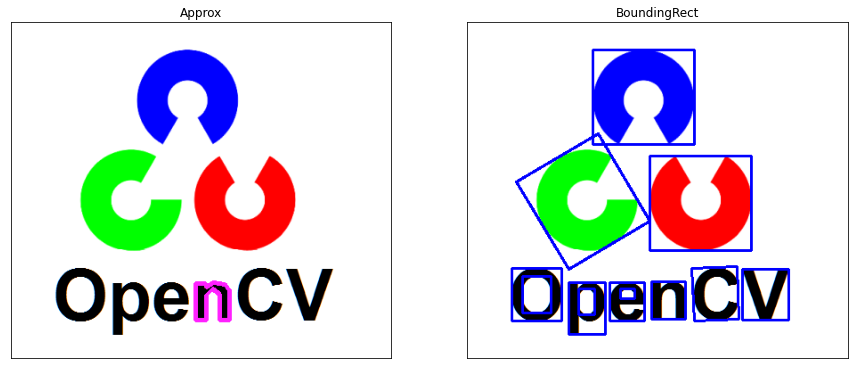

In [30]:

plt.subplot(121)
plt.imshow(img_approx)
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_cnt)
plt.title('BoundingRect')
plt.xticks([]), plt.yticks([])

plt.show()

In [31]:
c = cnt[9]
M = cv2.moments(c)
print(M)

{'m00': 7239.0, 'm10': 1898715.1666666665, 'm01': 1505439.8333333333, 'm20': 505868986.3333333, 'm11': 394843197.9166666, 'm02': 318281254.6666666, 'm30': 136804001757.65001, 'm21': 105140250741.13333, 'm12': 83475267517.63333, 'm03': 68337049063.65, 'mu20': 7855547.44259876, 'mu11': -18170.235583484173, 'mu02': 5206369.767275214, 'mu30': -1083314.992111206, 'mu21': -51947389.87743616, 'mu12': 928919.9763679504, 'mu03': -18943732.032806396, 'nu20': 0.14990609896305146, 'nu11': -0.0003467395688795744, 'nu02': 0.0993522841373363, 'nu30': -0.00024297316554020574, 'nu21': -0.011651109651380352, 'nu12': 0.00020834441398415065, 'nu03': -0.0042488275087804485}


In [32]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [33]:
area = cv2.contourArea(c)

In [34]:
perimeter = cv2.arcLength(c, True)

In [35]:
img_info = cv2.imread('logo.png')
img_info = cv2.circle(img_info, (cx, cy), 5, (0, 0, 255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = f'A{area} L{perimeter}'
img_info = cv2.putText(img_info, msg, (cx, cy), font, 0.5, (32, 32, 32), 1, cv2.LINE_AA)

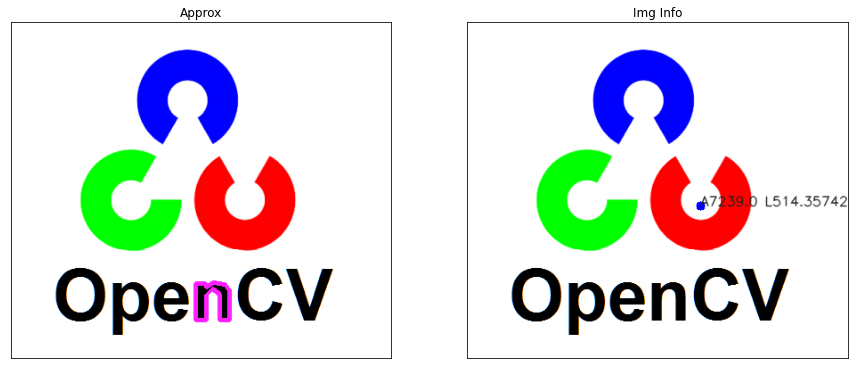

In [36]:
plt.subplot(121)
plt.imshow(img_approx)
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_info)
plt.title('Img Info')
plt.xticks([]), plt.yticks([])

plt.show()